Mean Sqaured Error: 33596915.85
mean Absolute Error: 4181.19
r2 Score: 0.78


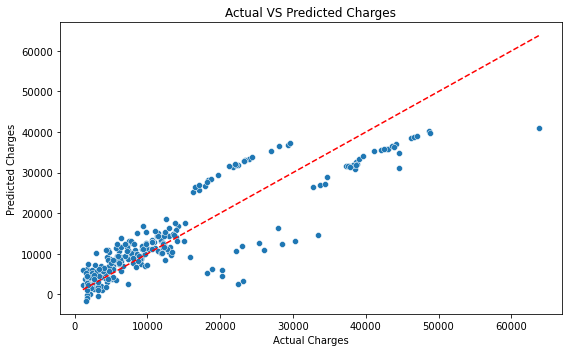

<Figure size 432x288 with 0 Axes>

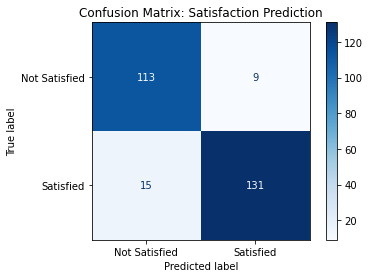

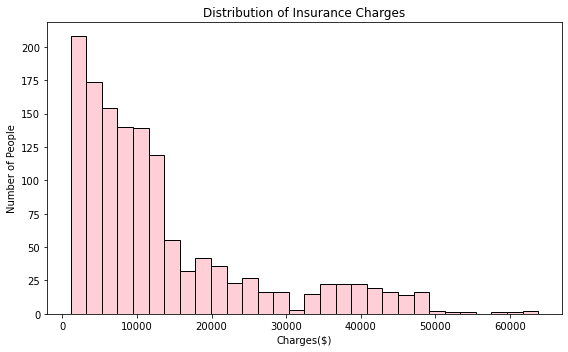

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('insurance.csv')
df_encoded = pd.get_dummies(df, drop_first = True)

X = df_encoded.drop('charges',axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)


print(f"Mean Sqaured Error: {round(mse,2)}")
print(f"mean Absolute Error: {round(mae,2)}")
print(f"r2 Score: {round(r2,2)}")


plt.figure(figsize = (8,5))
sns.scatterplot(x=y_test, y = y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title("Actual VS Predicted Charges")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.tight_layout()
plt.show()
plt.savefig('Actual VS Predicted Charges.png')

median_charge = df_encoded['charges'].median()
df_encoded['satisfaction'] = (df_encoded['charges']< median_charge).astype(int)

X = df_encoded.drop(['charges','satisfaction'], axis = 1)
y = df_encoded['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Not Satisfied','Satisfied'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Satisfaction Prediction")
plt.savefig('Confusion Matrix: Satisfaction Prediction')
plt.show()

plt.figure(figsize = (8,5))
sns.histplot(df['charges'],bins=30, color = 'pink')
plt.title("Distribution of Insurance Charges")
plt.xlabel('Charges($)')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()